In [1]:
from lambeq import SpacyTokeniser

In [2]:
tokeniser = SpacyTokeniser()
sentence = "John walks in the park"
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['John', 'walks', 'in', 'the', 'park']

In [3]:
from lambeq import BobcatParser

In [4]:
parser = BobcatParser()
diagram = parser.sentence2diagram(tokens, tokenised=True)

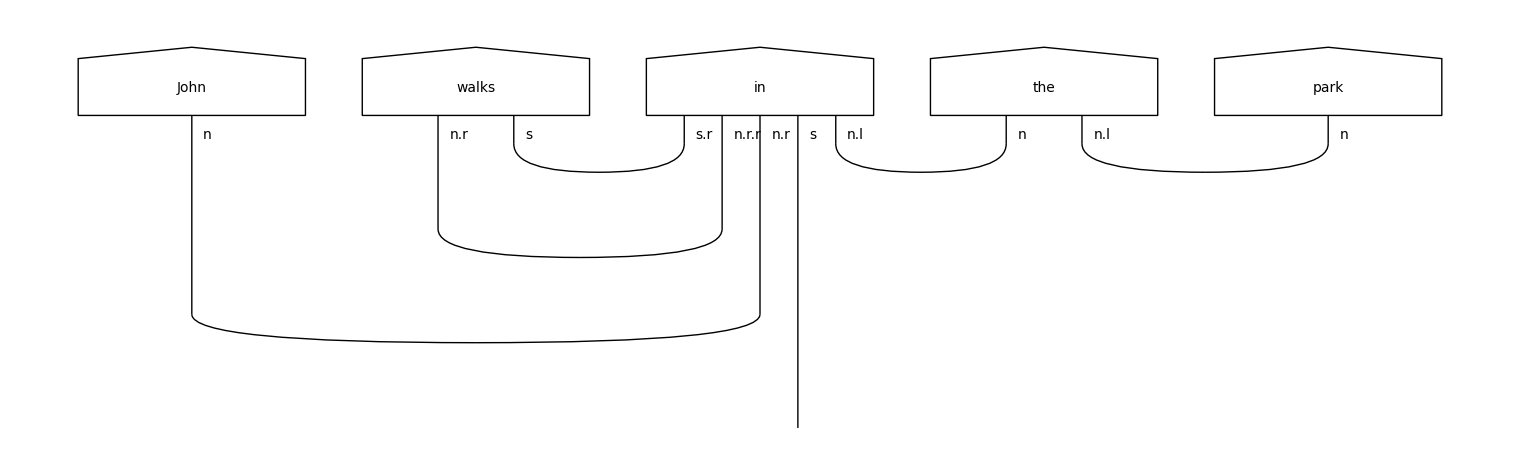

In [5]:
diagram.draw(figsize=(15, 20))

In [6]:
from lambeq import Rewriter

rewriter = Rewriter(['prepositional_phrase', 'determiner', 'curry'])
rewritten_diagram = rewriter(diagram)

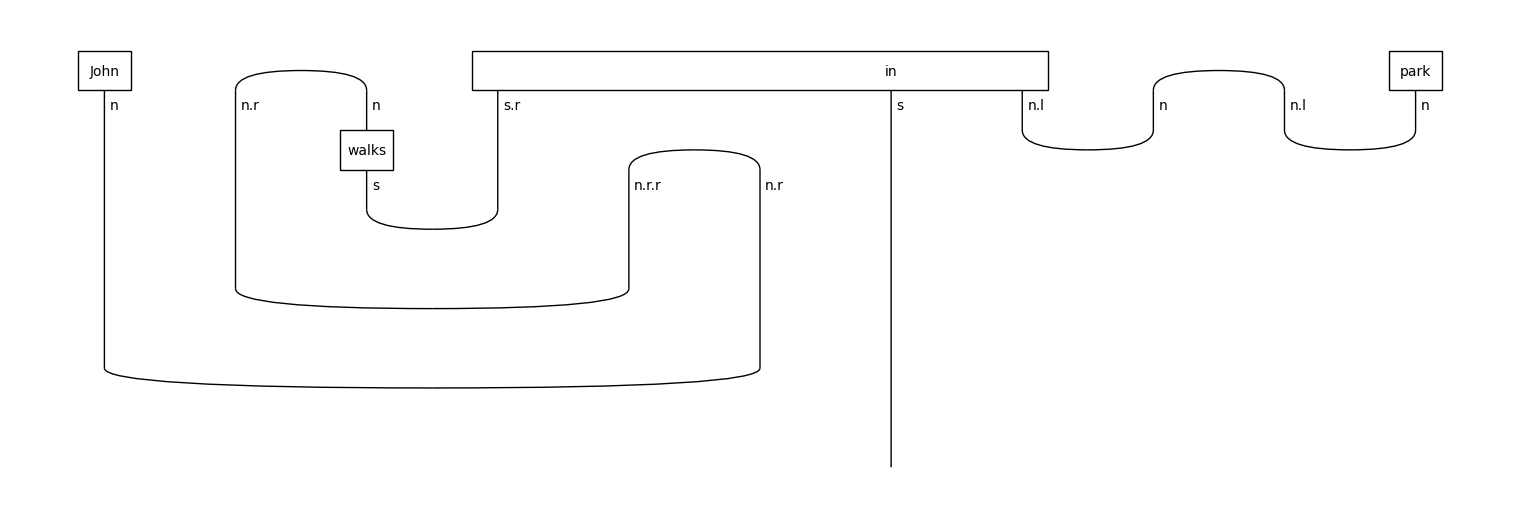

In [7]:
rewritten_diagram.draw(figsize=(15, 5))

In [8]:
# All types of Rewriter rules
import lambeq.rewrite

lambeq.rewrite.Rewriter.available_rules()

['auxiliary',
 'connector',
 'determiner',
 'postadverb',
 'preadverb',
 'prepositional_phrase',
 'coordination',
 'curry',
 'object_rel_pronoun',
 'subject_rel_pronoun']

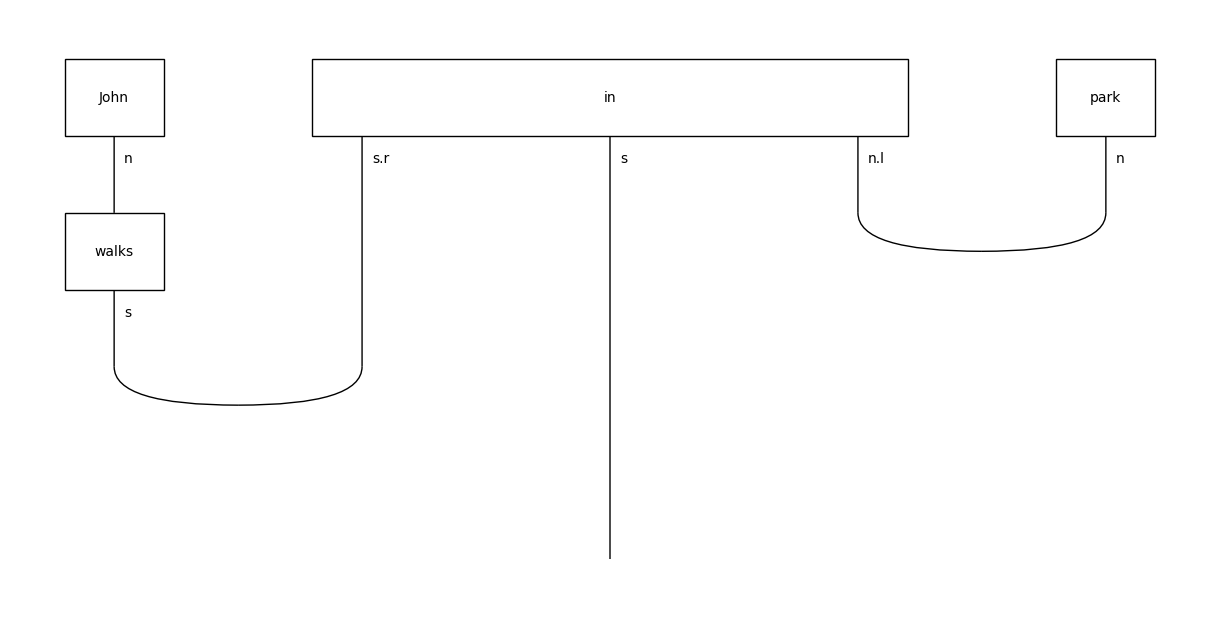

In [9]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(12, 6))

In [10]:
from lambeq import AtomicType, IQPAnsatz

In [11]:
# Define atomic types (ansatz for nouns and sentences)
N = AtomicType.NOUN
S = AtomicType.SENTENCE

In [12]:
# Convert string diagram into quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers = 2)
circuit = ansatz(diagram)

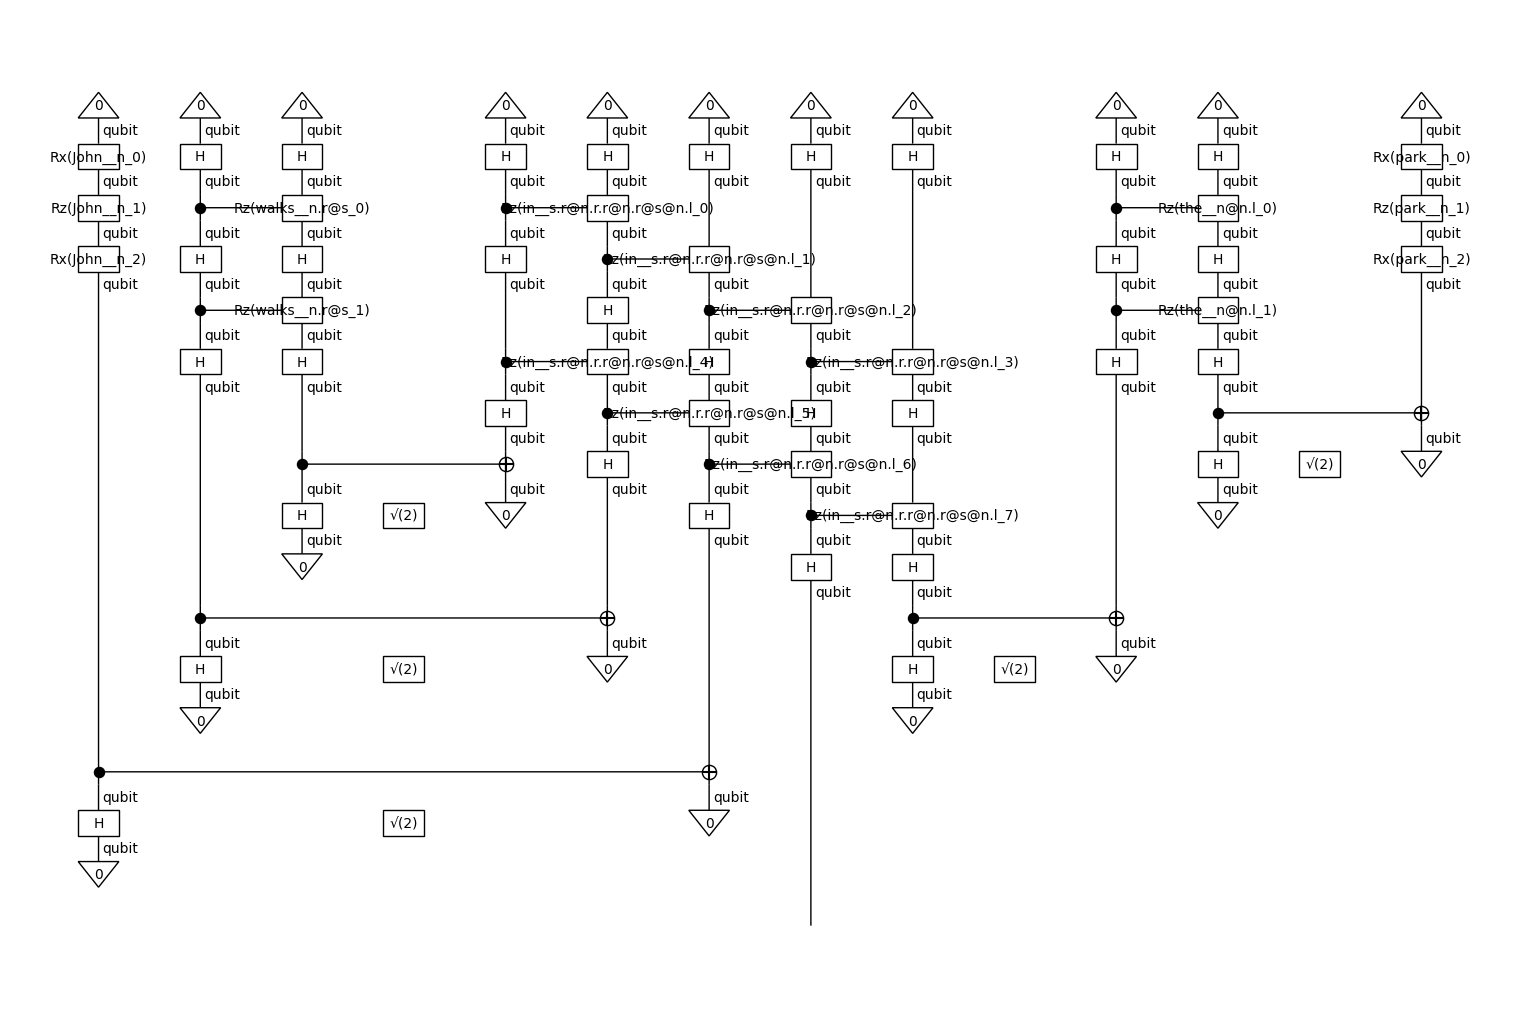

In [13]:
circuit.draw(figsize=(15, 10))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


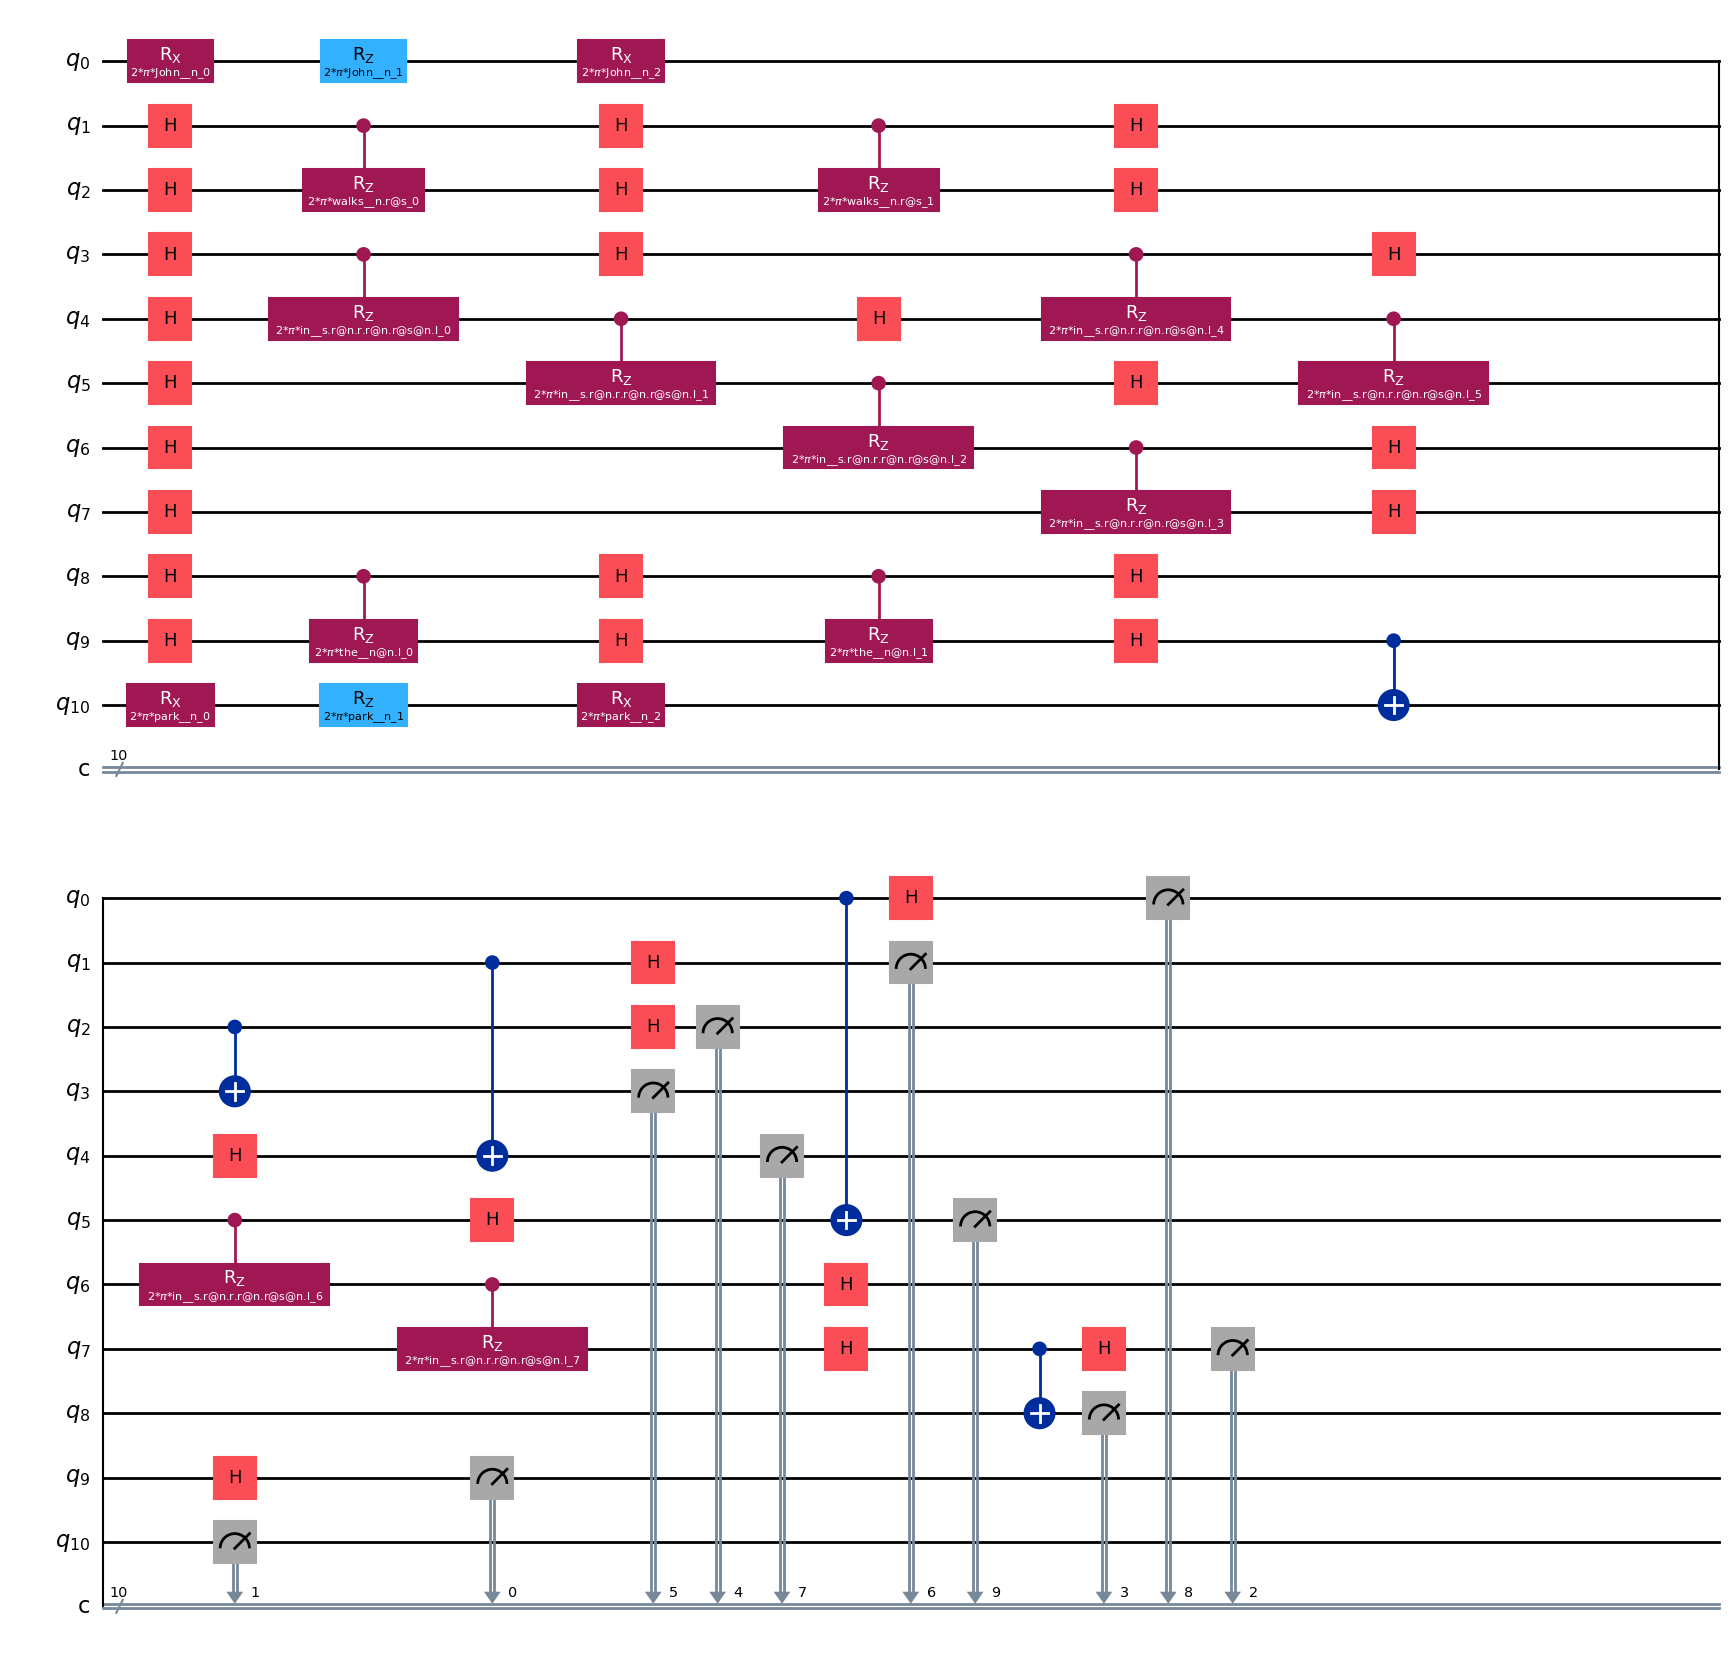

In [14]:
from pytket.extensions.qiskit import tk_to_qiskit
import matplotlib as mpl

qiskit_circuit = tk_to_qiskit(circuit.to_tk())
qiskit_circuit.draw(output="mpl")